In [1]:
import numpy as np 
import pandas as pd
import os
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from math import sqrt
from datetime import datetime

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

In [2]:
#Get data from online csv files on John Hopkins University repository
conf_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [3]:
#Load data
raw_tot_confirmed = pd.read_csv(conf_url)
raw_tot_deaths = pd.read_csv(deaths_url)
raw_tot_recovered = pd.read_csv(recovered_url)

print("The Shape of Cornfirmed cases is: ", raw_tot_confirmed.shape)
print("The Shape of Cornfirmed deaths is: ", raw_tot_deaths.shape)
print("The Shape of Cornfirmed recoveries is: ", raw_tot_recovered.shape)

raw_tot_confirmed.head()

The Shape of Cornfirmed cases is:  (266, 104)
The Shape of Cornfirmed deaths is:  (266, 104)
The Shape of Cornfirmed recoveries is:  (252, 104)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
raw_tot_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,150,166,179,188,188,207,220,228,252,260
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,345,356,385,394,403,410,422,431,455,470
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,282,309,333,344,344,344,385,398,423,468
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,7,7


In [5]:
raw_tot_recovered[raw_tot_recovered['Country/Region'] == 'Kenya']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
136,NaN,Kenya,-0.0236,37.9062,0,0,0,0,0,0,...,74,74,89,94,98,106,114,124,129,144


In [6]:
# Un-Pivoting the data (reorganize with the dates as a culumn/feature)

raw_tot_confirmed2 = pd.melt(raw_tot_confirmed, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_tot_deaths2 = pd.melt(raw_tot_deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_tot_recovered2 = pd.melt(raw_tot_recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])


print("Confirmed cases shape is: ", raw_tot_confirmed2.shape)
print("Confirmed deaths shape is: ", raw_tot_deaths2.shape)
print("Confirmed recoveries shape is: ", raw_tot_recovered2.shape)


raw_tot_confirmed2.head()

Confirmed cases shape is:  (26600, 6)
Confirmed deaths shape is:  (26600, 6)
Confirmed recoveries shape is:  (25200, 6)


,Province/State,Country/Region,Lat,Long,Date,value
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [7]:
#Converting the new column to dates

raw_tot_confirmed2['Date'] = pd.to_datetime(raw_tot_confirmed2['Date'])
raw_tot_deaths2['Date'] = pd.to_datetime(raw_tot_deaths2['Date'])
raw_tot_recovered2['Date'] = pd.to_datetime(raw_tot_recovered2['Date'])

In [8]:
# Renaming the Values
raw_tot_confirmed2.columns = raw_tot_confirmed2.columns.str.replace('value', 'Confirmed')
raw_tot_deaths2.columns = raw_tot_deaths2.columns.str.replace('value', 'Deaths')
raw_tot_recovered2.columns = raw_tot_recovered2.columns.str.replace('value', 'Recovered')

In [9]:
# Investigating the NULL values
raw_tot_recovered2.isnull().sum()

Province/State    18500
Country/Region        0
Lat                   0
Long                  0
Date                  0
Recovered             0
dtype: int64

In [10]:
# Dealing with NULL values

raw_tot_confirmed2['Province/State'].fillna(raw_tot_confirmed2['Country/Region'], inplace=True)
raw_tot_deaths2['Province/State'].fillna(raw_tot_deaths2['Country/Region'], inplace=True)
raw_tot_recovered2['Province/State'].fillna(raw_tot_recovered2['Country/Region'], inplace=True)

raw_tot_confirmed2.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
dtype: int64

In [11]:
# printing shapes before the join
print("Confirmed cases shape is: ", raw_tot_confirmed2.shape)
print("Confirmed deaths shape is: ", raw_tot_deaths2.shape)
print("Confirmed recoveries shape is: ", raw_tot_recovered2.shape)

Confirmed cases shape is:  (26600, 6)
Confirmed deaths shape is:  (26600, 6)
Confirmed recoveries shape is:  (25200, 6)


In [12]:
raw_tot_confirmed2.isnull().sum()
raw_tot_deaths2.isnull().sum()
raw_tot_recovered2.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Recovered         0
dtype: int64

In [13]:
# Full Joins

# Confirmed with Deaths
full_join = raw_tot_confirmed2.merge(raw_tot_deaths2[['Province/State','Country/Region','Date','Deaths']], 
                                      how = 'left', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])

print("Shape of first join: ", full_join.shape)

# full join with Recovered
full_join = full_join.merge(raw_tot_recovered2[['Province/State','Country/Region','Date','Recovered']], 
                                      how = 'left', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])

print("Shape of second join: ", full_join.shape)

full_join.tail()

Shape of first join:  (26600, 7)
Shape of second join:  (26600, 8)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
26595,Western Sahara,Western Sahara,24.215500,-12.885800,2020-04-30,6,0,5.0
26596,Sao Tome and Principe,Sao Tome and Principe,0.186360,6.613081,2020-04-30,14,0,4.0
26597,Yemen,Yemen,15.552727,48.516388,2020-04-30,6,2,1.0
26598,Comoros,Comoros,-11.645500,43.333300,2020-04-30,1,0,0.0
26599,Tajikistan,Tajikistan,38.861034,71.276093,2020-04-30,15,0,0.0


In [14]:
#Removing null values
full_join['Recovered'].fillna(0, inplace=True)
#Calculate active cases
full_join['Active Cases'] = full_join['Confirmed'] - (full_join['Deaths'] + full_join['Recovered']) 

full_join.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active Cases
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,0.0
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,0.0
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,0.0
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,0.0
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0,0.0


In [15]:
# checking for null values (especially long and lat)
full_join.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active Cases      0
dtype: int64

In [16]:
# Adding Month and Year as a new Column
full_join['Month-Year'] = full_join['Date'].dt.strftime('%b-%Y')

In [17]:
full_join.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active Cases,Month-Year
26595,Western Sahara,Western Sahara,24.215500,-12.885800,2020-04-30,6,0,5.0,1.0,Apr-2020
26596,Sao Tome and Principe,Sao Tome and Principe,0.186360,6.613081,2020-04-30,14,0,4.0,10.0,Apr-2020
26597,Yemen,Yemen,15.552727,48.516388,2020-04-30,6,2,1.0,3.0,Apr-2020
26598,Comoros,Comoros,-11.645500,43.333300,2020-04-30,1,0,0.0,1.0,Apr-2020
26599,Tajikistan,Tajikistan,38.861034,71.276093,2020-04-30,15,0,0.0,15.0,Apr-2020


In [18]:
# Braking the numbers by Day 


## Applying it on all dataset

#creating a new df    
full_join2 = full_join.copy()

#creating a new date columns - 1
full_join2['Date - 1'] = full_join2['Date'] + pd.Timedelta(days=1)
full_join2.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1',
                          'Date': 'Date Minus 1'}, inplace=True)

#Joing on the 2 DFs
full_join3 = full_join.merge(full_join2[['Province/State', 'Country/Region','Confirmed - 1', 'Deaths - 1', 
                            'Recovered - 1', 'Date - 1', 'Date Minus 1']], how = 'left',
                             left_on = ['Province/State','Country/Region','Date'], 
                             right_on = ['Province/State', 'Country/Region','Date - 1'])

#minus_onedf.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1'}, inplace=True)

full_join3.head()

# Additional Calculations
full_join3['Confirmed Daily'] = full_join3['Confirmed'] - full_join3['Confirmed - 1']
full_join3['Deaths Daily'] = full_join3['Deaths'] - full_join3['Deaths - 1']
full_join3['Recovered Daily'] = full_join3['Recovered'] - full_join3['Recovered - 1']

print(full_join3.shape)

(26600, 18)


In [19]:
full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active Cases,Month-Year,Confirmed - 1,Deaths - 1,Recovered - 1,Date - 1,Date Minus 1,Confirmed Daily,Deaths Daily,Recovered Daily
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [20]:
# Editing manually the numbers for first day

full_join3['Confirmed Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Confirmed']
full_join3['Deaths Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Deaths']
full_join3['Recovered Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Recovered']

# deleting columns
del full_join3['Confirmed - 1']
del full_join3['Deaths - 1']
del full_join3['Recovered - 1']
del full_join3['Date - 1']
del full_join3['Date Minus 1']

C:\Users\Acal2\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
#Calculate daily active cases
full_join3['Active Cases Daily'] = full_join3['Confirmed Daily'] - (full_join3['Deaths Daily'] + full_join3['Recovered Daily']) 
full_join3.shape

(26600, 14)

In [22]:
# removing all rows that have no useful data (dates that had no cases in countries)
new_join = full_join3.loc[full_join3['Confirmed'] * 1 != 0]
print(new_join.shape)

(16238, 14)


In [23]:
my_join = new_join
#Grouping the data by Continent
Africa = ['Kenya', 'Uganda','Tanzania', 'Rwanda', 'Burundi', 'Ethiopia', 'Mauritania', 'Sudan', 'Eritrea', 'South Sudan', 'Western Sahara', 'Somalia', 'Djibouti', 'Mozambique',  'Mauritius', 'Madagascar', 'Malawi', 'Zambia', 'Zimbabwe', 'Seychelles', 'Congo (Kinshasa)', 'Angola', 'Cameroon', 'Chad', 'Central African Republic', 'Congo (Brazzaville)', 'Gabon', 'Equatorial Guinea', 'Sao Tome and Principe', 'South Africa', 'Namibia', 'Botswana', 'Eswatini', 'Nigeria', 'Ghana', "Cote d'Ivoire", 'Niger', 'Burkina Faso', 'Mali', 'Cabo Verde', 'Togo', 'Sierra Leone', 'Liberia', 'Senegal', 'Guinea', 'Benin', 'Guinea-Bissau', 'Egypt', 'Algeria', 'Morocco', 'Tunisia', 'Libya', 'Gambia', 'Comoros']
Asia = ['China', 'Nepal', 'India', 'Pakistan', 'Bangladesh', 'Iran', 'Afghanistan', 'Sri Lanka', 'Maldives', 'Sri Lanka', 'Maldives', 'Japan', 'Korea, South', 'Taiwan*', 'Mongolia', 'Indonesia', 'Philippines', 'Vietnam', 'Thailand', 'Burma', 'Malaysia', 'Cambodia', 'Laos', 'Singapore', 'Timor-Leste', 'Brunei', 'Uzbekistan', 'Kazakhstan', 'Kyrgyzstan', 'Turkey', 'Iraq', 'Saudi Arabia', 'Yemen', 'Syria', 'Azerbaijan', 'Iraq', 'Saudi Arabia', 'Yemen', 'Syria', 'Azerbaijan', 'United Arab Emirates', 'Israel', 'Jordan', 'Lebanon', 'State of Palestine', 'Oman', 'Kuwait', 'Georgia', 'Armenia', 'Qatar', 'Bahrain', 'Cyprus', 'West Bank and Gaza', 'Bhutan', 'Tajikistan']
Europe = ['Germany', 'France', 'Netherlands', 'Belgium', 'Austria', 'Switzerland', 'Kosovo', 'Luxembourg', 'Monaco', 'Liechtenstein', 'Russia', 'Ukraine', 'Poland', 'Romania', 'Czechia', 'Belarus', 'Hungary', 'Bulgaria', 'Slovakia', 'Moldova', 'United Kingdom', 'Sweden', 'Denmark', 'Norway', 'Latvia', 'Estonia', 'Iceland', 'Finland', 'Lithuania', 'Italy', 'Spain', 'Greece', 'Portugal', 'Serbia', 'Croatia', 'Bosnia and Herzegovina', 'Albania', 'North Macedonia', 'Slovenia', 'Montenegro', 'Malta', 'Andorra', 'Gibraltar', 'San Marino', 'Holy See', 'Ireland']
N_America = ['US', 'Canada']
S_America = ['Brazil', 'Colombia', 'Argentina', 'Peru', 'Venezuela', 'Chile', 'Ecuador', 'Bolivia', 'Paraguay', 'Uruguay', 'Guyana', 'Suriname', 'Falkland Islands', 'Mexico', 'Guatemala', 'Honduras', 'Nicaragua', 'El Salvador', 'Costa Rica', 'Panama', 'Belize', 'Cuba', 'Haiti', 'Dominican Republic', 'Puerto Rico', 'Jamaica', 'Trinidad and Tobago', 'Guadeloupe', 'Martinique', 'Bahamas', 'Barbados', 'Saint Lucia', 'Curaçao', 'Saint Vincent - Grenadines', 'Grenada', 'Aruba', 'Antigua and Barbuda', 'Dominica', 'Saint Kitts and Nevis', 'Anguilla', 'Montserrat', 'Saint-Barthélemy', 'Saint Vincent and the Grenadines']
Australia = ['Australia', 'New Zealand', 'Papua New Guinea', 'Fiji', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga', 'Wallis and Futuna Islands', 'Tuvalu', 'Niue', 'Tokelau', 'Guam', 'Kiribati', 'Micronesia', 'Northern Mariana Islands', 'Marshall Islands', 'Palau', 'Nauru']
Other = ['MS Zaandam', 'Diamond Princess']

#Creating a condition to categorize countiries' rows into continents 
my_cond=[my_join['Country/Region'].isin(Africa),my_join['Country/Region'].isin(Asia),my_join['Country/Region'].isin(Europe),my_join['Country/Region'].isin(N_America),my_join['Country/Region'].isin(S_America),my_join['Country/Region'].isin(Australia),my_join['Country/Region'].isin(Other)]
continents = ['Africa', 'Asia', 'Europe', 'N_America', 'S_America', 'Australia', 'Other']

#Creating continents column based on the above condition
my_join['Continent'] = np.select(my_cond, continents)

#check to see if there is any new country that has not been assigned a country
my_join[my_join['Continent'] == '0']

C:\Users\Acal2\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active Cases,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily,Active Cases Daily,Continent


In [24]:
my_join.groupby('Continent')['Confirmed Daily', 'Deaths Daily', 'Recovered Daily', 'Active Cases Daily'].sum()

C:\Users\Acal2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed Daily,Deaths Daily,Recovered Daily,Active Cases Daily
Continent,,,,
Africa,38826.0,1634.0,12543.0,24649.0
Asia,520415.0,18635.0,265787.0,235993.0
Australia,8272.0,112.0,7006.0,1154.0
Europe,1348599.0,135317.0,478571.0,734711.0
N_America,1123881.0,66305.0,153947.0,903629.0
Other,721.0,15.0,645.0,61.0
S_America,216133.0,11369.0,74830.0,129934.0


In [25]:
# Exporting the data

# Setting my path
path = r"C:\Users\Acal2\Documents\DS\covid"

# Changing my CWD
os.chdir(path)

my_join.to_csv('CoViD PowerBI Raw', sep='\t')

In [26]:
my_join[my_join['Country/Region'] == 'Tanzania'].tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active Cases,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily,Active Cases Daily,Continent
25478,Tanzania,Tanzania,-6.369,34.8888,2020-04-26,299,10,48.0,241.0,Apr-2020,0.0,0.0,0.0,0.0,Africa
25744,Tanzania,Tanzania,-6.369,34.8888,2020-04-27,299,10,48.0,241.0,Apr-2020,0.0,0.0,0.0,0.0,Africa
26010,Tanzania,Tanzania,-6.369,34.8888,2020-04-28,299,10,48.0,241.0,Apr-2020,0.0,0.0,0.0,0.0,Africa
26276,Tanzania,Tanzania,-6.369,34.8888,2020-04-29,480,16,167.0,297.0,Apr-2020,181.0,6.0,119.0,56.0,Africa
26542,Tanzania,Tanzania,-6.369,34.8888,2020-04-30,480,16,167.0,297.0,Apr-2020,0.0,0.0,0.0,0.0,Africa


In [27]:
#Grouping the data by regions in Africa
E_Africa1 = my_join.loc[my_join['Country/Region'].isin(['Kenya', 'Uganda','Tanzania', 'Rwanda', 'Ethiopia', 'Eritrea', 'Somalia'])]  
E_Africa2 = my_join.loc[my_join['Country/Region'].isin(['Mozambique',  'Mauritius', 'Madagascar', 'Malawi', 'Zambia', 'Zimbabwe', 'Seychelles'])]
C_Africa = my_join.loc[my_join['Country/Region'].isin(['Congo (Kinshasa)', 'Angola', 'Cameroon', 'Chad', 'Central African Republic', 'Congo (Brazzaville)', 'Gabon', 'Equatorial Guinea', 'Sao Tome and Principe'])]
S_Africa = my_join.loc[my_join['Country/Region'].isin(['South Africa', 'Namibia', 'Botswana', 'Eswatini'])]
W_Africa1 = my_join.loc[my_join['Country/Region'].isin(['Nigeria', 'Ghana', "Cote d'Ivoire", 'Niger', 'Burkina Faso', 'Mali', 'Cabo Verde'])] 
W_Africa2 = my_join.loc[my_join['Country/Region'].isin(['Togo', 'Sierra Leone', 'Liberia', 'Senegal', 'Guinea', 'Benin', 'Guinea-Bissau'])]
N_Africa = my_join.loc[my_join['Country/Region'].isin(['Egypt', 'Algeria', 'Morocco', 'Tunisia', 'Libya'])] 


In [28]:
#creating chart settings
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

#setting image saving path
os.chdir(r'C:\Users\Acal2\Documents\DS\covid\images')

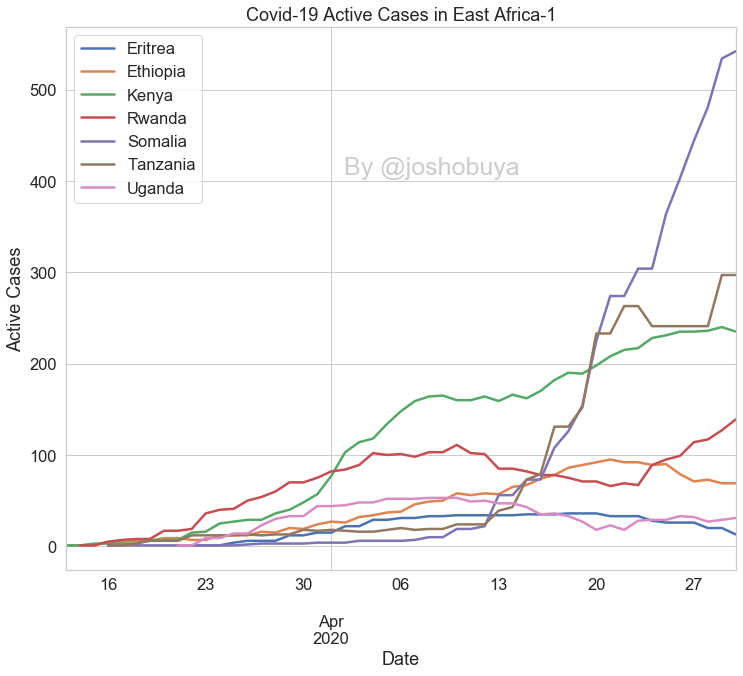

In [29]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

#plotting
for label, grp in E_Africa1.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in East Africa-1')
    ax.set_ylabel('Active Cases')

#saving chart as image
fig.savefig('E.Africa1 covid 19.png')

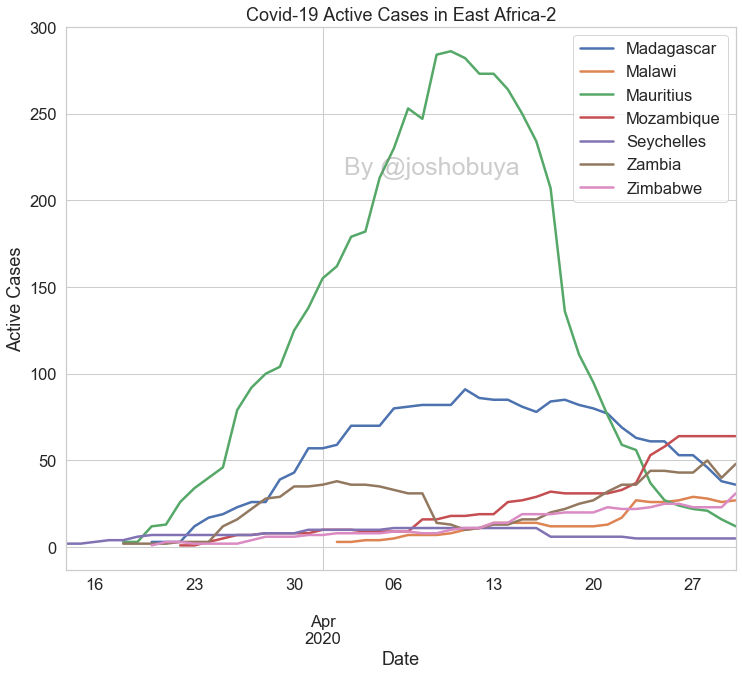

In [30]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in E_Africa2.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in East Africa-2')
    ax.set_ylabel('Active Cases')

fig.savefig('E.Africa2 covid 19.png')

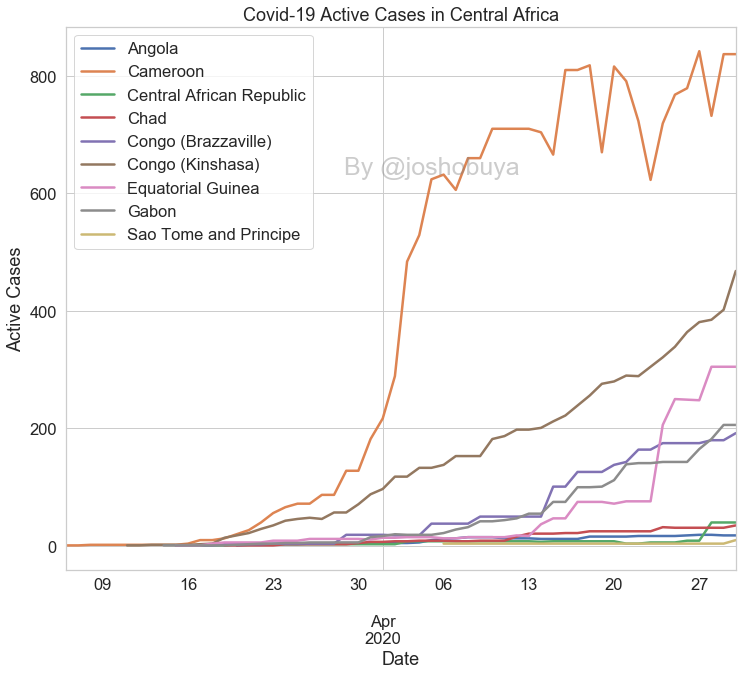

In [31]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in C_Africa.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in Central Africa')
    ax.set_ylabel('Active Cases')

fig.savefig('C.Africa covid 19.png')

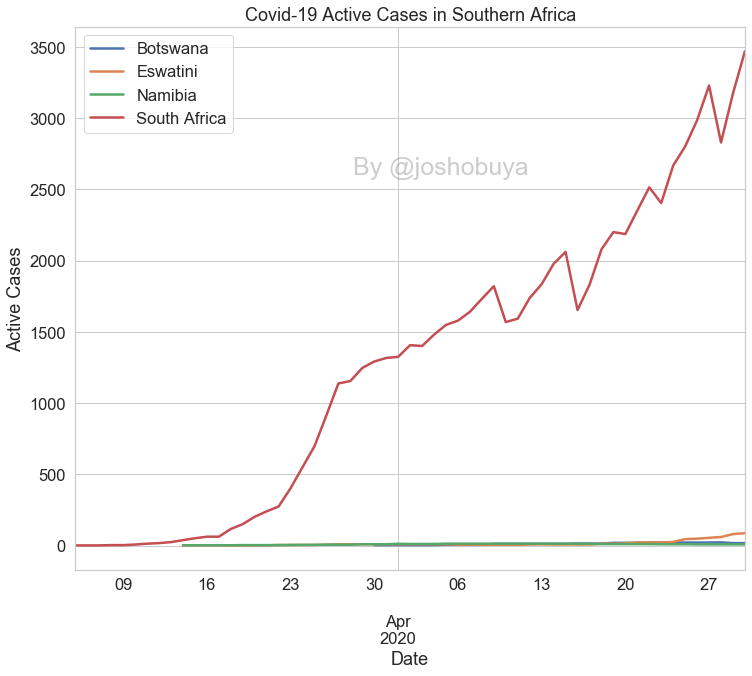

In [32]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in S_Africa.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in Southern Africa')
    ax.set_ylabel('Active Cases')

fig.savefig('S.Africa covid 19.png')

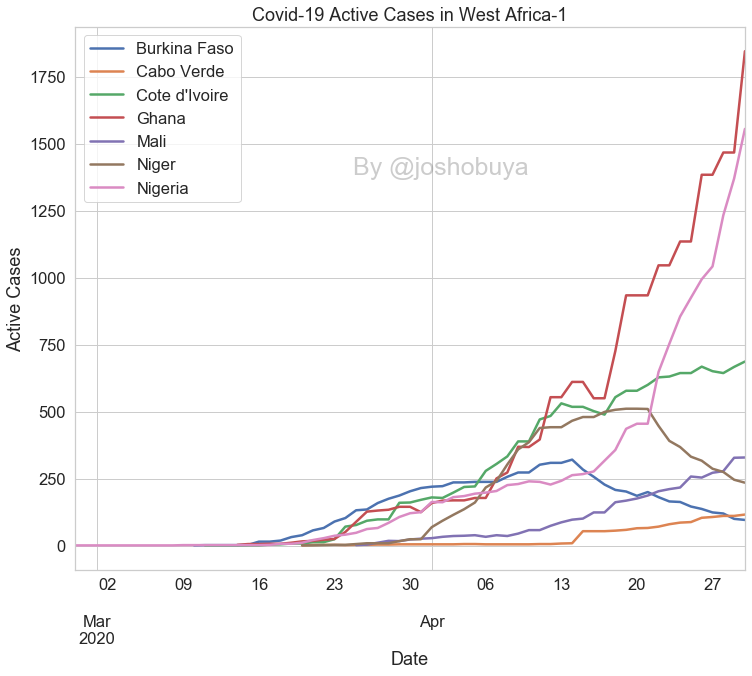

In [33]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in W_Africa1.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in West Africa-1')
    ax.set_ylabel('Active Cases')

fig.savefig('W.Africa1 covid 19.png')

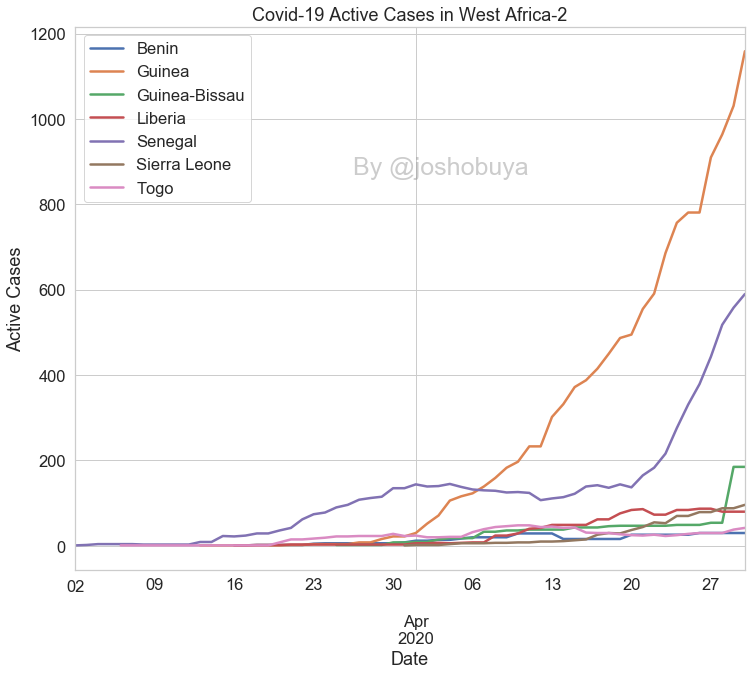

In [34]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in W_Africa2.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in West Africa-2')
    ax.set_ylabel('Active Cases')

fig.savefig('W.Africa2 covid 19.png')

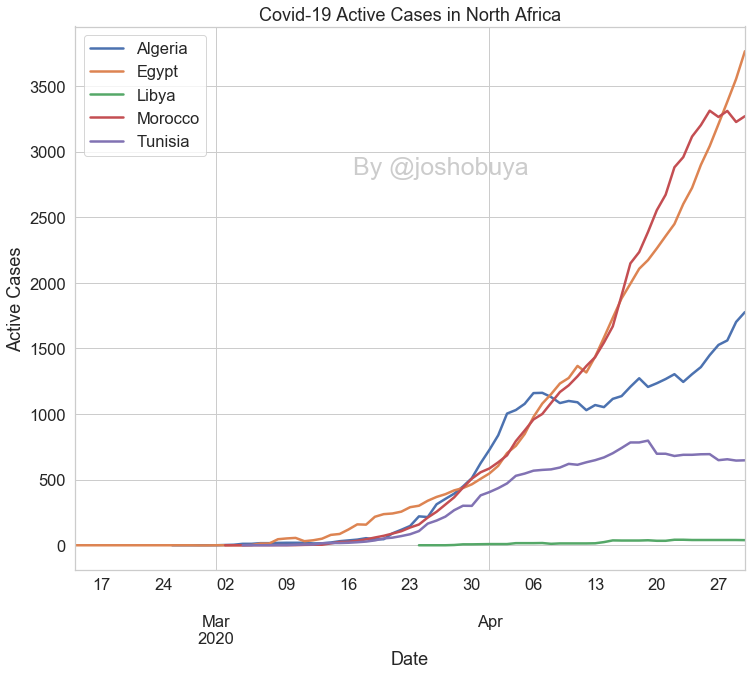

In [35]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in N_Africa.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in North Africa')
    ax.set_ylabel('Active Cases')

fig.savefig('N.Africa covid 19.png')

In [36]:
#Grouping the data by regions in Asia
S_Asia1 = my_join.loc[my_join['Country/Region'].isin(['India', 'Pakistan', 'Bangladesh', 'Iran', 'Afghanistan', 'Sri Lanka', 'Maldives'])]
S_Asia2 = my_join.loc[my_join['Country/Region'].isin([ 'Sri Lanka', 'Maldives'])]
E_Asia = my_join.loc[my_join['Country/Region'].isin(['Japan', 'Korea, South', 'Taiwan*', 'Mongolia'])]
SE_Asia1 = my_join.loc[my_join['Country/Region'].isin(['Indonesia', 'Philippines', 'Vietnam', 'Thailand', 'Burma', 'Malaysia'])]
SE_Asia2 = my_join.loc[my_join['Country/Region'].isin(['Cambodia', 'Laos', 'Singapore', 'Timor-Leste', 'Brunei'])]
C_Asia = my_join.loc[my_join['Country/Region'].isin(['Uzbekistan', 'Kazakhstan', 'Kyrgyzstan'])]
W_Asia1a = my_join.loc[my_join['Country/Region'].isin(['Turkey', 'Iraq', 'Saudi Arabia', 'Yemen', 'Syria', 'Azerbaijan'])]
W_Asia1b = my_join.loc[my_join['Country/Region'].isin(['Iraq', 'Saudi Arabia', 'Yemen', 'Syria', 'Azerbaijan'])]
W_Asia1c = my_join.loc[my_join['Country/Region'].isin(['Iraq', 'Yemen', 'Syria', 'Azerbaijan'])]
W_Asia2a = my_join.loc[my_join['Country/Region'].isin(['United Arab Emirates', 'Israel', 'Jordan', 'Lebanon', 'State of Palestine', 'Oman'])]
W_Asia2b = my_join.loc[my_join['Country/Region'].isin(['United Arab Emirates', 'Jordan', 'Lebanon', 'State of Palestine', 'Oman'])]
W_Asia3a = my_join.loc[my_join['Country/Region'].isin(['Kuwait', 'Georgia', 'Armenia', 'Qatar', 'Bahrain', 'Cyprus'])]
W_Asia3b = my_join.loc[my_join['Country/Region'].isin(['Kuwait', 'Georgia', 'Armenia', 'Bahrain', 'Cyprus'])]


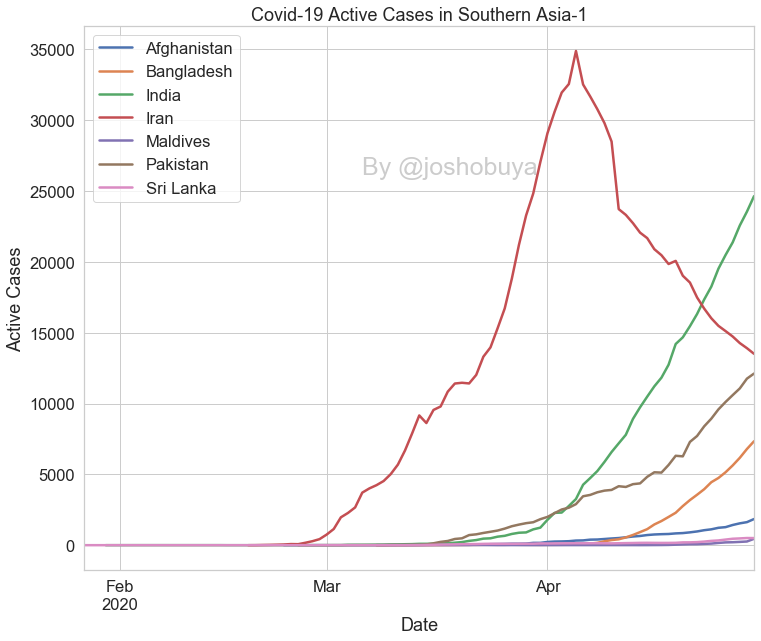

In [37]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in S_Asia1.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in Southern Asia-1')
    ax.set_ylabel('Active Cases')

fig.savefig('S.Asia1 covid 19.png')

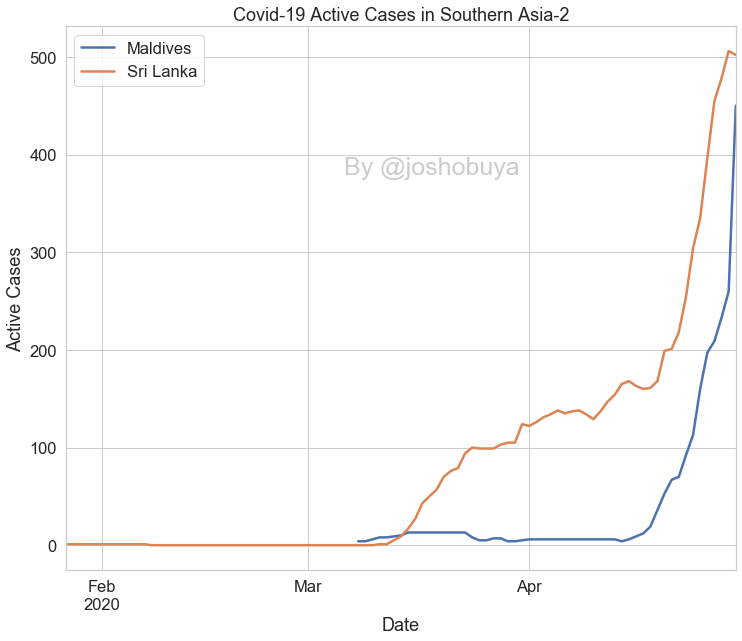

In [38]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in S_Asia2.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in Southern Asia-2')
    ax.set_ylabel('Active Cases')

fig.savefig('S.Asia2 covid 19.png')

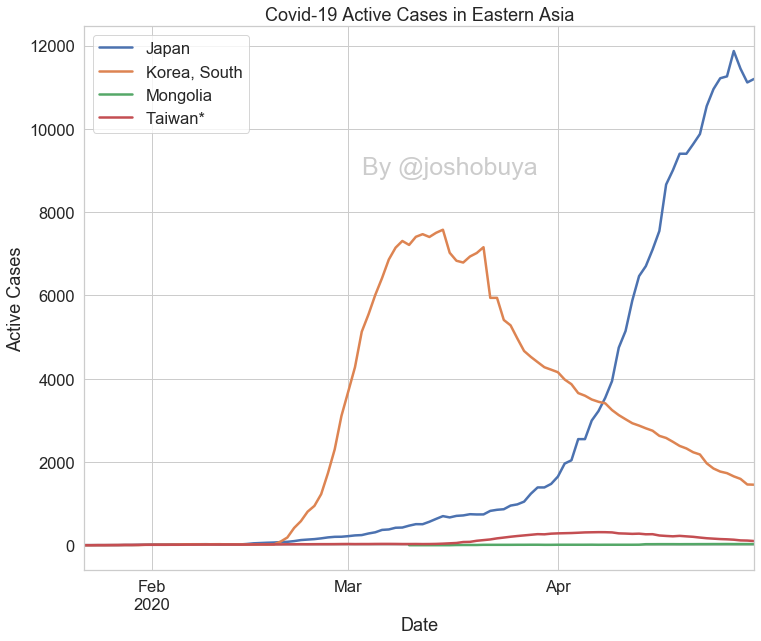

In [39]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in E_Asia.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in Eastern Asia')
    ax.set_ylabel('Active Cases')

fig.savefig('E.Asia covid 19.png')

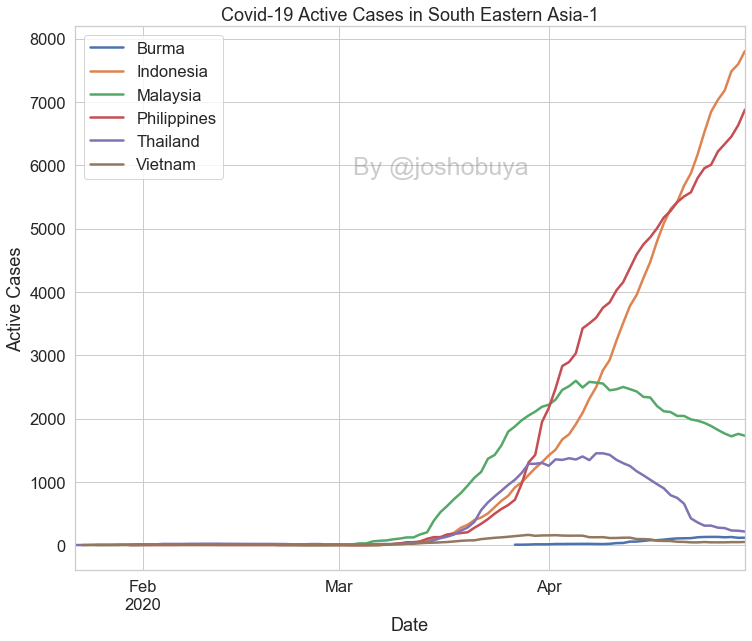

In [40]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in SE_Asia1.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in South Eastern Asia-1')
    ax.set_ylabel('Active Cases')

fig.savefig('SE_Asia1 covid 19.png')

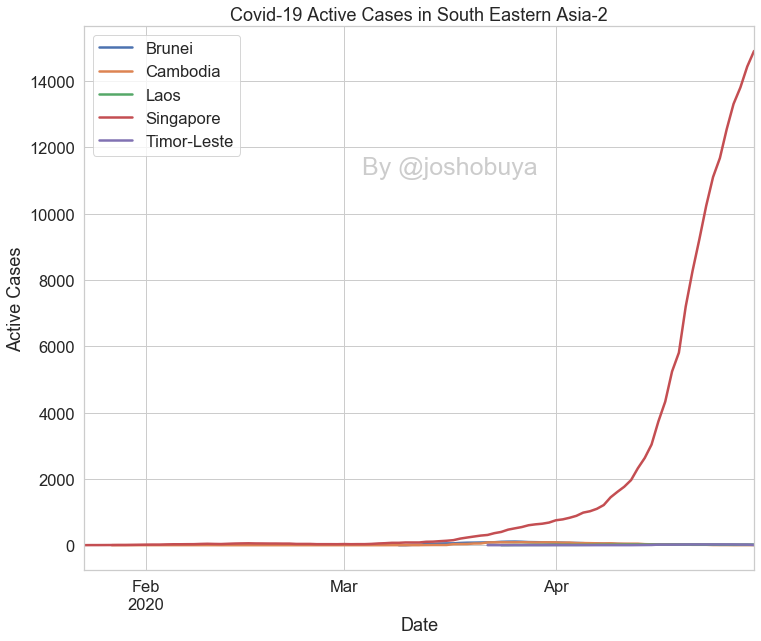

In [41]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in SE_Asia2.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in South Eastern Asia-2')
    ax.set_ylabel('Active Cases')

fig.savefig('SE.Asia2 covid 19.png')

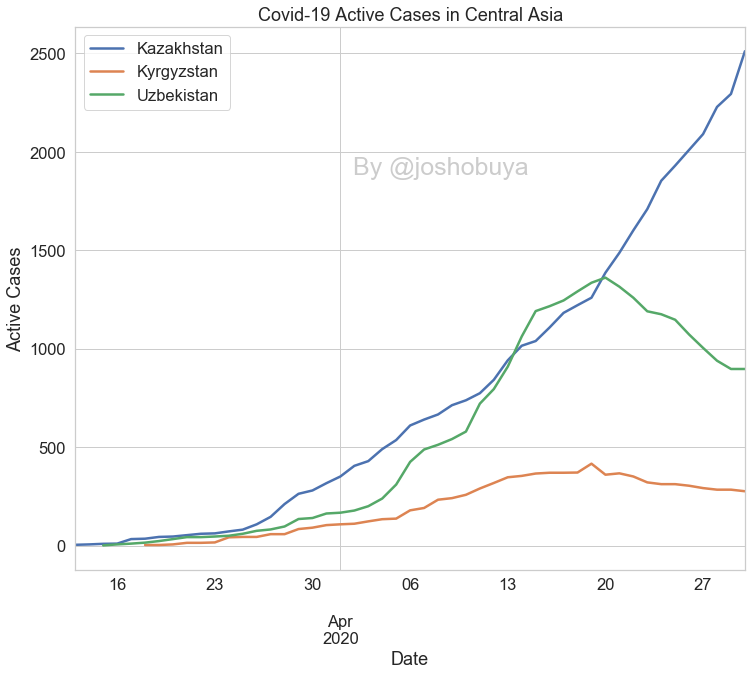

In [42]:

fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in C_Asia.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in Central Asia')
    ax.set_ylabel('Active Cases')

fig.savefig('C.Asia covid 19.png')

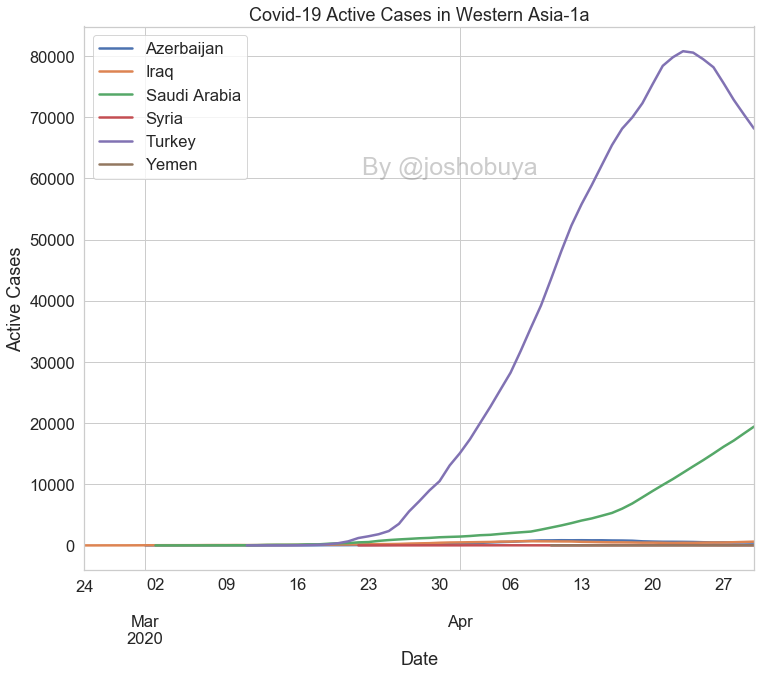

In [43]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in W_Asia1a.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in Western Asia-1a')
    ax.set_ylabel('Active Cases')

fig.savefig('W.Asia1a covid 19.png')

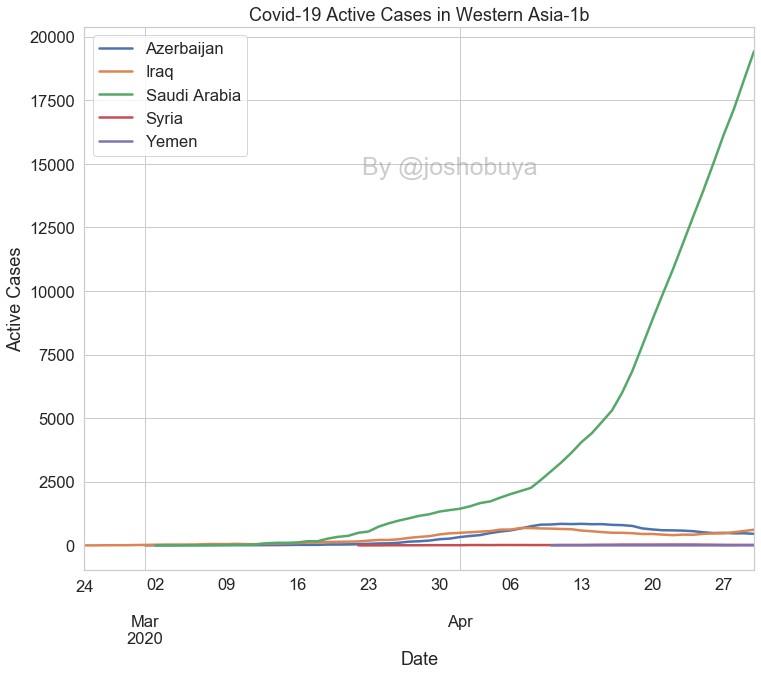

In [44]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in W_Asia1b.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in Western Asia-1b')
    ax.set_ylabel('Active Cases')

fig.savefig('W_Asia1b covid 19.png')

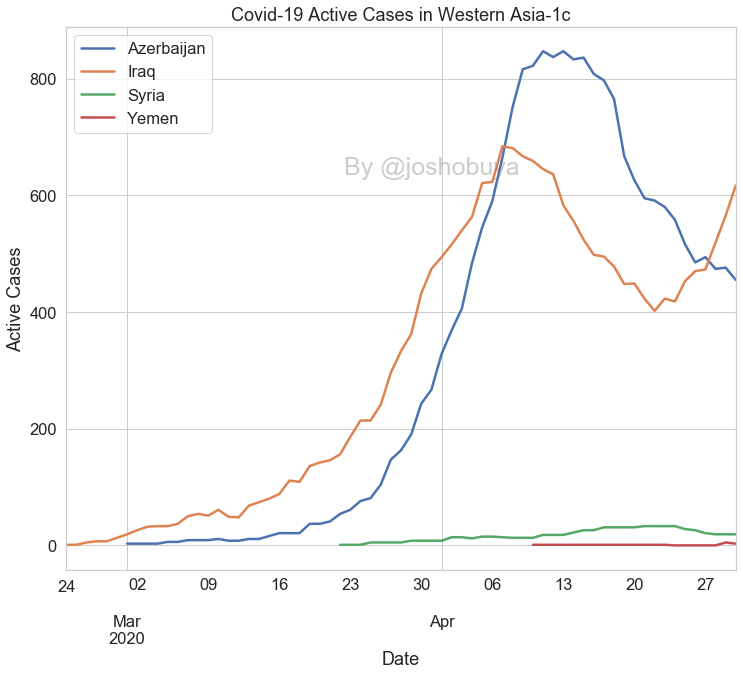

In [45]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in W_Asia1c.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in Western Asia-1c')
    ax.set_ylabel('Active Cases')

fig.savefig('W_Asia1c covid 19.png')

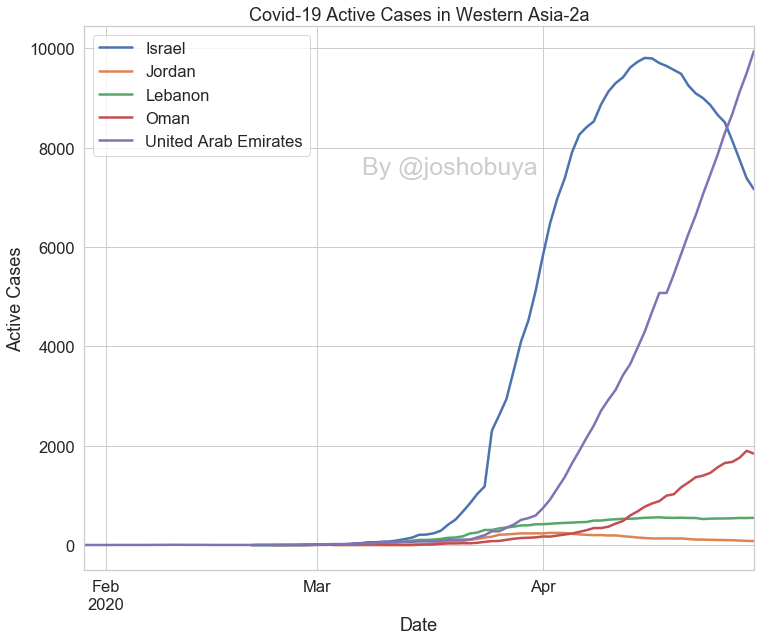

In [46]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in W_Asia2a.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in Western Asia-2a')
    ax.set_ylabel('Active Cases')

fig.savefig('W_Asia2a covid 19.png')

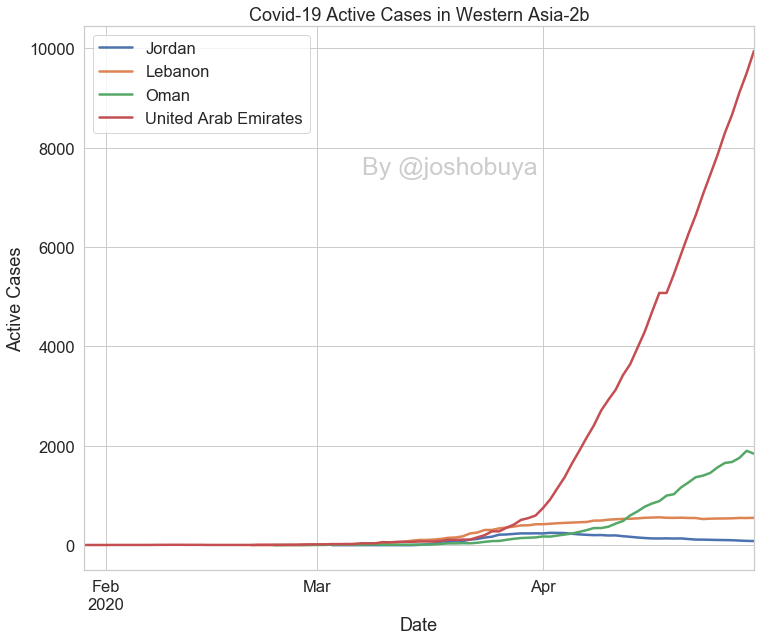

In [47]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in W_Asia2b.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in Western Asia-2b')
    ax.set_ylabel('Active Cases')

fig.savefig('W_Asia2b covid 19.png')

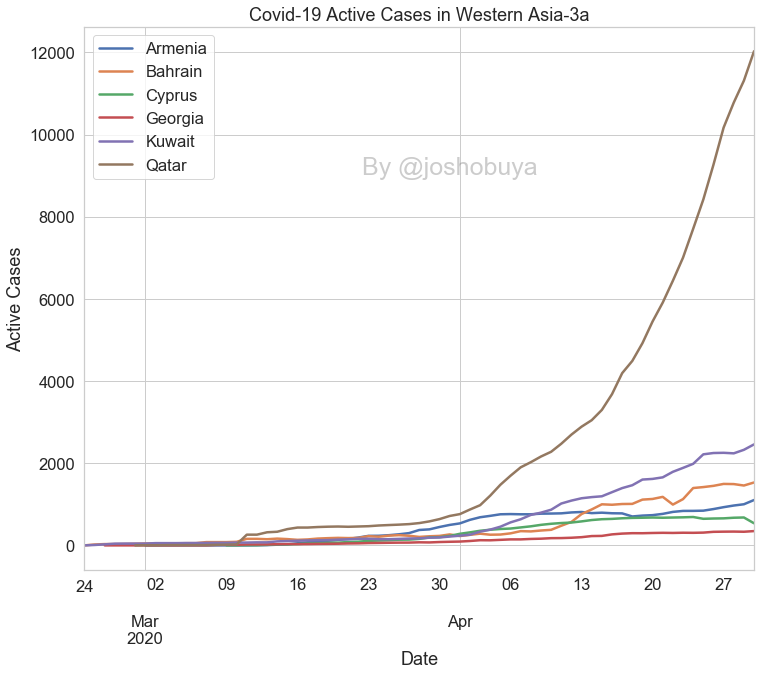

In [48]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in W_Asia3a.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in Western Asia-3a')
    ax.set_ylabel('Active Cases')

fig.savefig('W_Asia3a covid 19.png')

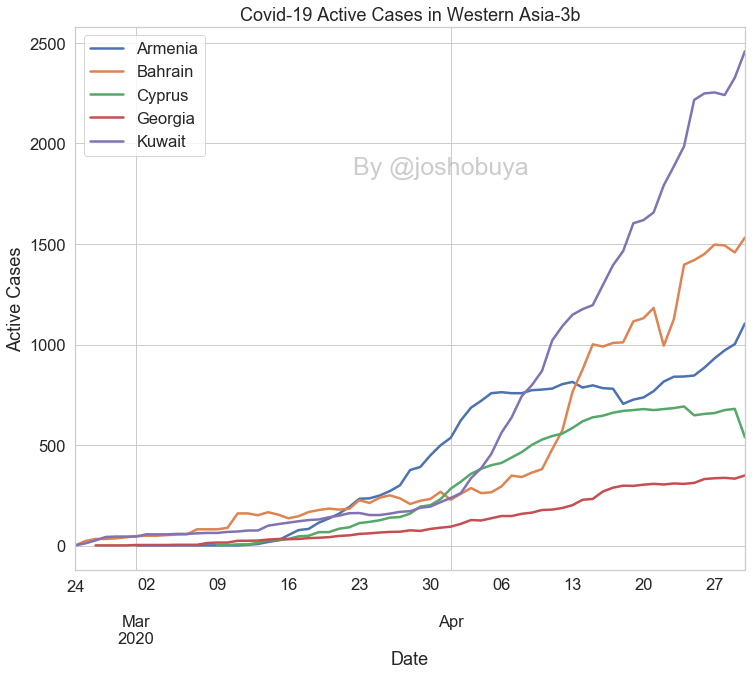

In [49]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in W_Asia3b.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in Western Asia-3b')
    ax.set_ylabel('Active Cases')

fig.savefig('W_Asia3b covid 19.png')

In [50]:
#Grouping the data by regions in Europe
W_Europe1 = my_join.loc[my_join['Country/Region'].isin(['Germany', 'France', 'Netherlands', 'Belgium', 'Austria'])]
W_Europe2 = my_join.loc[my_join['Country/Region'].isin([ 'Switzerland', 'Luxembourg', 'Monaco', 'Liechtenstein'])]
E_Europe1a = my_join.loc[my_join['Country/Region'].isin(['Russia', 'Ukraine', 'Poland', 'Romania', 'Czechia', 'Belarus'])]
E_Europe1b = my_join.loc[my_join['Country/Region'].isin(['Ukraine', 'Poland', 'Romania', 'Czechia', 'Belarus'])]
E_Europe2 = my_join.loc[my_join['Country/Region'].isin(['Hungary', 'Bulgaria', 'Slovakia', 'Moldova'])]
N_Europe1a = my_join.loc[my_join['Country/Region'].isin(['United Kingdom', 'Sweden', 'Denmark', 'Norway'])]
N_Europe1b = my_join.loc[my_join['Country/Region'].isin(['Sweden', 'Denmark', 'Ireland', 'Norway'])]
N_Europe2 = my_join.loc[my_join['Country/Region'].isin(['Latvia', 'Estonia', 'Iceland', 'Finland', 'Lithuania'])]
S_Europe1a = my_join.loc[my_join['Country/Region'].isin(['Italy', 'Spain', 'Greece', 'Portugal', 'Serbia', 'Croatia', 'Bosnia and Herzegovina', 'Albania'])]
S_Europe1b = my_join.loc[my_join['Country/Region'].isin(['Greece', 'Serbia', 'Croatia', 'Bosnia and Herzegovina', 'Albania'])]
S_Europe2 = my_join.loc[my_join['Country/Region'].isin(['North Macedonia', 'Slovenia', 'Montenegro', 'Malta', 'Andorra', 'Gibraltar', 'San Marino', 'Holy See'])]


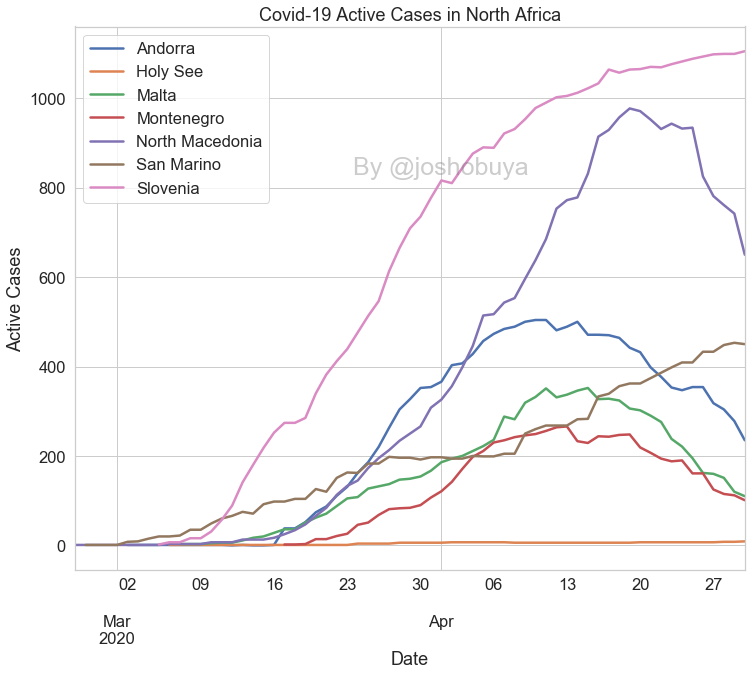

In [51]:
fig, ax = plt.subplots()
# watermark position details
fig.text(0.65, 0.7, 'By @joshobuya',
         fontsize=25, color='gray',
         ha='right', va='top', alpha=0.4)

for label, grp in S_Europe2.groupby('Country/Region'):
    grp.plot(x = 'Date', y = 'Active Cases',ax = ax, label = label)
    ax.set_title('Covid-19 Active Cases in North Africa')
    ax.set_ylabel('Active Cases')

fig.savefig('N.Africa covid 19.png')

# The above codes can be replicated to create more slides for the country groups below

In [52]:
#Grouping the data by regions in America
N_America = my_join.loc[my_join['Country/Region'].isin(['US', 'Canada', 'Bermuda', 'Greenland', 'Saint Pierre and Miquelon'])]
S_America1 = my_join.loc[my_join['Country/Region'].isin(['Brazil', 'Colombia', 'Argentina', 'Peru', 'Venezuela', 'Chile'])]
S_America2 = my_join.loc[my_join['Country/Region'].isin(['Ecuador', 'Bolivia', 'Paraguay', 'Uruguay', 'Guyana', 'Suriname', 'Falkland Islands'])] 
C_America = my_join.loc[my_join['Country/Region'].isin(['Mexico', 'Guatemala', 'Honduras', 'Nicaragua', 'El Salvador', 'Costa Rica', 'Panama', 'Belize'])] 
Caribbean1 = my_join.loc[my_join['Country/Region'].isin(['Cuba', 'Haiti', 'Dominican Republic', 'Puerto Rico', 'Jamaica', 'Trinidad and Tobago', 'Guadeloupe'])] 
Caribbean2 = my_join.loc[my_join['Country/Region'].isin(['Martinique', 'Bahamas', 'Barbados', 'Saint Lucia', 'Curaçao', 'Saint Vincent - Grenadines', 'Grenada'])] 
Caribbean3 = my_join.loc[my_join['Country/Region'].isin(['Aruba', 'Antigua and Barbuda', 'Dominica', 'Saint Kitts and Nevis', 'Anguilla', 'Montserrat', 'Saint-Barthélemy'])]


In [53]:
#Grouping the data by regions in Australia
Australia & New Zealand = my_join.loc[my_join['Country/Region'].isin(['Australia', 'New Zealand'])]
Melanesia = my_join.loc[my_join['Country/Region'].isin(['Papua New Guinea', 'Fiji', 'Solomon Islands', 'Vanuatu'])]
Polynesia = my_join.loc[my_join['Country/Region'].isin(['Samoa', 'Tonga', 'Wallis and Futuna Islands', 'Tuvalu', 'Niue', 'Tokelau'])]
Micronesia = my_join.loc[my_join['Country/Region'].isin(['Guam', 'Kiribati', 'Micronesia', 'Northern Mariana Islands', 'Marshall Islands', 'Palau', 'Nauru'])]


SyntaxError: invalid syntax (<ipython-input-53-57abba8ede3a>, line 2)